In [89]:
# import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
from IPython.display import display, Image
from pandas.tools.plotting import table
import PIL
import cStringIO
import urllib

In [43]:
da = [
['Grass',    '8EF7AA'],       
['Fire'  ,    'F3AF61'],
['Water'  ,   '61A5F3'],
['Bug'     ,    'A5C663'],
['Normal'   ,   'CDDCAF'],
['Poison'   ,   'AA89DB'],
['Electric'  ,  'F1F582'],
['Ground' ,     'DECB9E'],
['Fairy'   ,    'F397C2'],
['Fighting' ,   'E85463'],
['Psychic'   ,   'F779C1'],
['Rock'   ,     'E8CC6F'],
['Ghost'   ,    '7A30C4'],
['Ice'      ,   '3EDBF3'],
['Dragon'    ,  '6324E1']]

tipos_df = pd.DataFrame(da,columns=['tipo','color'])

In [11]:
data_poke = pd.read_csv('data/pokemonGO.csv')

### Cantidad de Pokemon por tipo

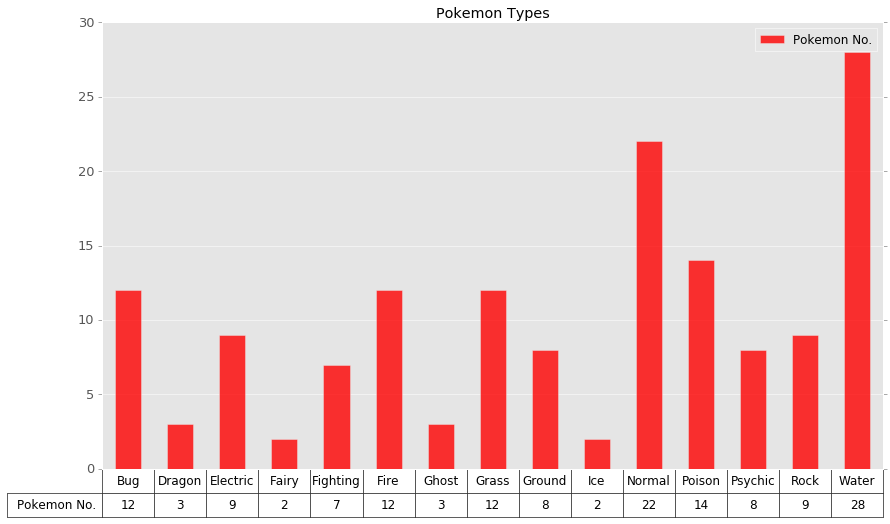

In [12]:
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)   # Hide Ticks
t = table(ax,types.transpose(),cellLoc='center')
t.auto_set_font_size(False)
t.set_fontsize(12)
t.set_visible(True)
ax.add_table(t)
types.plot(ax = ax,kind='bar',color='red',figsize=(14,8),fontsize=13,title='Pokemon Types',sort_columns=True,alpha=0.8)

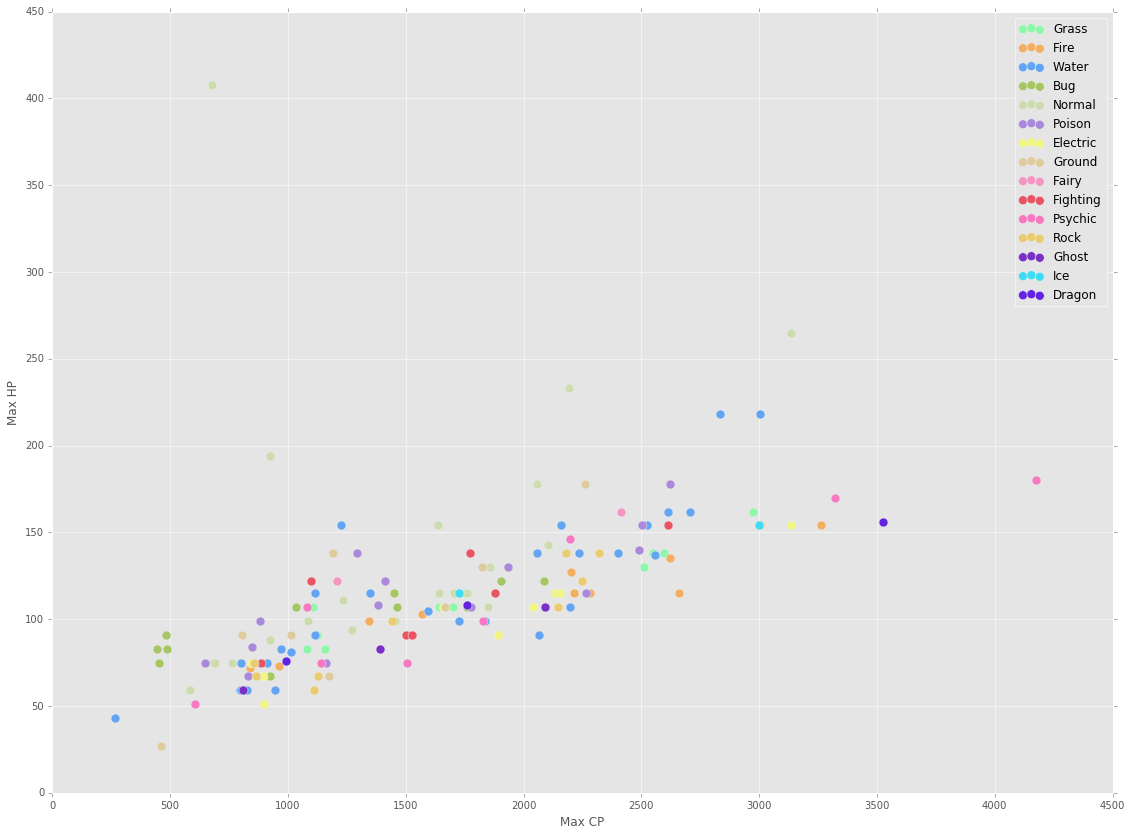

In [57]:
fig, ax = plt.subplots(1, 1)
for tipo,color in tipos_df.values:
    data_poke[data_poke['Type 1']==tipo].plot(ax=ax,kind='scatter', x='Max CP', y='Max HP',figsize=(19,14),label = tipo, color = '#'+color,s=80 );
    
    

### Top 5 CP

In [85]:
top5_CP = data_poke.sort_values('Max CP',ascending = False)[:5]

In [172]:
def generaImg(x):
    images_cs = [ cStringIO.StringIO(urllib.urlopen(f).read()) for f in [x['Image URL']] ]
    images = [PIL.Image.open(f) for f in images_cs ]
    return images[0]
    
top5_CP['img'] = top5_CP.apply(lambda x: generaImg(x),axis = 1)

NameError: name 'ax0' is not defined

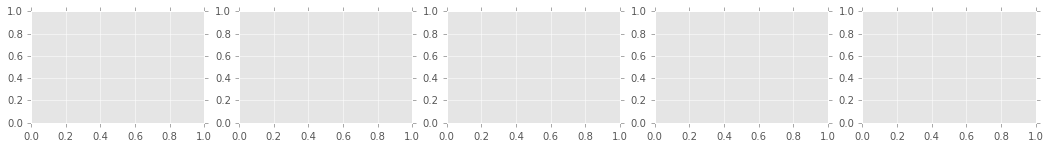

In [182]:
imagenes = top5_CP.img.tolist()
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5,figsize=(18, 2))
for cont in range(0,5):
    eval("ax"+str(cont)+".get_xaxis().set_visible(False)")
    eval('ax'+str(cont)+'.get_yaxis().set_visible(False)')
    eval('ax'+str(cont)+'.imshow(imagenes['+str(cont)+'])')
